Demonstration that oscillation can happen with just 1 neuron as you adjust a fixed parameter.
In this case, the (bifurcation) parameter being used is mu, but in our worm case, it's the injected current.

I used the Hopf bifurcation example from here: https://en.wikipedia.org/wiki/Hopf_bifurcation#Example

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


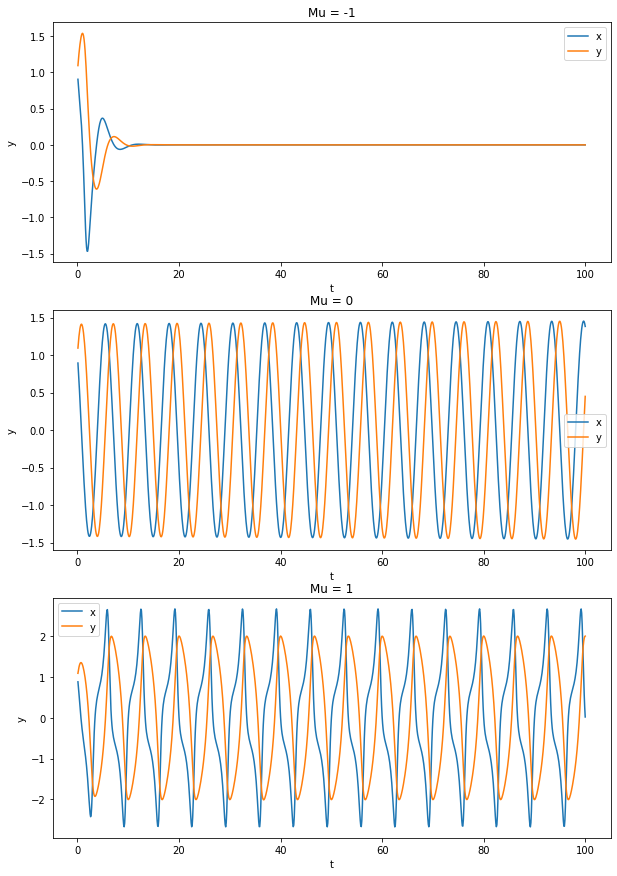

In [22]:
from scipy import integrate, linalg, sparse
import pylab as plt

def plot_dynamics(ax, mu):
  def dynamic(t, states):
    x = states[0]
    y = states[1]
    dx = mu * (1-y*y)*x - y
    dy = x
    return [dx, dy]

  dyn = integrate.ode(dynamic).set_integrator('vode', atol = 1e-3, min_step = 1e-6, method = 'bdf', with_jacobian = True)
  dyn.set_initial_value((1,1), 0)

  dt = 0.1

  xs = []
  ys = []
  ts = []
  for t in range(1000):
    dyn.integrate(dyn.t + dt)
    x = dyn.y[0]
    y = dyn.y[1]
    xs.append(x)
    ys.append(y)
    ts.append(dyn.t)
  ax.plot(ts,xs, label="x")
  ax.plot(ts,ys, label="y")
  ax.set_xlabel("t")
  ax.set_ylabel("y")
  ax.set_title("Mu = {}".format(mu))
  ax.legend()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
plot_dynamics(axes[0], -1)
plot_dynamics(axes[1], 0)
plot_dynamics(axes[2], 1)
fig.show()